<h1 style="font-size:32px;">Boosting Theory</h1>


<h2 style="font-size:28px;">Practical</h2>


<h3>14.Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [15]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r'C:\Users\rajuc\Downloads\water_potability.csv')

In [5]:
df=pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
df.isna().sum()
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

X=df.drop('Potability',axis=1)
y=df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=AdaBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.6086956521739131


<h3>15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [9]:
data=pd.read_csv(r'C:\Users\rajuc\Downloads\Student_Performance.csv')
df=pd.DataFrame(data)
df.head()

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Papers_Practiced,Performance
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [13]:
df.Extracurricular_Activities.unique()
encod={'Yes':1,'No':0}
df.isna().sum()
df['Extracurricular_Activities']=df['Extracurricular_Activities'].map(encod)
df.head()



,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Papers_Practiced,Performance
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [15]:
df.isna().sum()

Hours_Studied                 0
Previous_Scores               0
Extracurricular_Activities    0
Sleep_Hours                   0
Sample_Papers_Practiced       0
Performance                   0
dtype: int64

In [17]:
df.dtypes
X=df.drop('Performance',axis=1).values
y=df['Performance']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
model=AdaBoostRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2)
print('Mean Squared Error:',mse)

Mean Absolute Error: 2.43501636407393
R2 Score: 0.9763161967945002
Mean Squared Error: 9.403146514989546


<h3>16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
X=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=GradientBoostingClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
feature_importance=model.feature_importances_

columns=X.columns
for feature,importance in zip(columns,feature_importance):
  print(f'{feature}:  {importance}')


Accuracy: 0.956140350877193
mean radius:  1.292348076813499e-05
mean texture:  0.027804583634348873
mean perimeter:  0.00020118364232095282
mean area:  0.0004254033042015456
mean smoothness:  0.0024666044618570173
mean compactness:  0.0029960469868226245
mean concavity:  0.0009222332874449441
mean concave points:  0.4505275876506107
mean symmetry:  0.0005199404606719796
mean fractal dimension:  0.00010669160100635732
radius error:  0.006870207891017868
texture error:  0.003604013810768886
perimeter error:  0.001156802373414802
area error:  0.008415272506866505
smoothness error:  0.0005564528920603285
compactness error:  0.0025106349835955057
concavity error:  0.013067922820320132
concave points error:  0.0020381084784025583
symmetry error:  0.0007028625799243465
fractal dimension error:  0.004223933303430293
worst radius:  0.075588875185215
worst texture:  0.03988648003422685
worst perimeter:  0.05140821113749899
worst area:  0.0382446945612126
worst smoothness:  0.004810830759634738
w

<h3>17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [57]:
data=pd.read_csv(r'C:\Users\rajuc\Downloads\Dummy Data HSS.csv')
df=pd.DataFrame(data)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [59]:
df.Influencer.value_counts()
encod={'Mega':1,'Micro':2,'Nano':3,'Macro':4}
df['Influencer']=df['Influencer'].map(encod).astype(int)
df.isna().sum()
df.shape
df.isna().sum()
df.dropna()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,4,253.610411


In [67]:
df.isna().sum()
df=df.dropna()
df.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [69]:
X=df.drop('Sales',axis=1)
y=df['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print('R2 Score:',r2)

R2 Score: 0.9989628568326727


<h3>18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [17]:
data=pd.read_csv(r'C:\Users\rajuc\Downloads\water_potability.csv')
df=pd.DataFrame(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [19]:
#df=df.dropna()
#df.head()
#df.shape
X=df.drop('Potability',axis=1)
y=df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [25]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score using XG Boost:',accuracy)

Accuracy score using XG Boost: 0.8152173913043478


<h3>19.Train a CatBoost Classifier and evaluate using F1-Score

In [9]:
from catboost import CatBoostClassifier

In [11]:
from sklearn.datasets import make_classification

In [39]:
X,y=X,y=make_classification(n_samples=1000,n_features=10,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=CatBoostClassifier(n_estimators=100,random_state=42,verbose=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)



Accuracy: 0.885


In [41]:
f1_scor=f1_score(y_test,y_pred)
print('F1_score:',f1_scor)

F1_score: 0.8930232558139535


<h3>20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [33]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
X,y=make_regression(n_samples=1000,n_features=10,random_state=42)
model=XGBRegressor(n_estimators=100,random_state=42,verbose=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.16687147596781812


<h3>21.Train an AdaBoost Classifier and visualize feature importance

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10'],
      dtype='object')
Accuracy: 0.85
Feature Importance: [0.15 0.05 0.06 0.05 0.1  0.06 0.14 0.05 0.21 0.13]


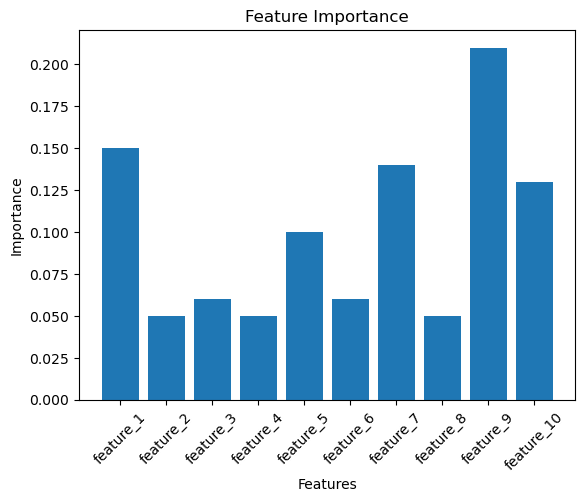

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=10,random_state=42)
df=pd.DataFrame(X,columns=[f'feature_{i}' for i in range(1,11)])
col_names=df.columns
print(col_names)
df['target']=y

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=AdaBoostClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
feature_importance=model.feature_importances_
print('Feature Importance:',feature_importance)
plt.bar(range(len(feature_importance)),feature_importance)
plt.xticks(ticks=range(len(col_names)),labels=col_names,rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

<h3>22.Train a Gradient Boosting Regressor and plot learning curves

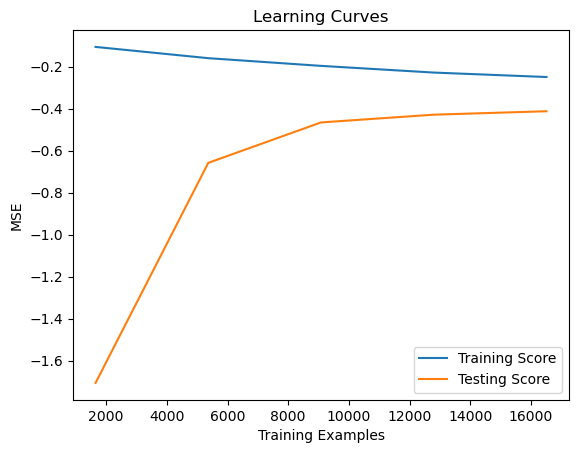

In [63]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
X=df.drop('target',axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=GradientBoostingRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

train_sizes,train_scores,test_scores=learning_curve(model,X,y,cv=5,scoring='neg_mean_squared_error',train_sizes=np.linspace(0.1,1.0,5))

train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
plt.plot(train_sizes,train_scores_mean,label='Training Score')
plt.plot(train_sizes,test_scores_mean,label='Testing Score')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.title('Learning Curves')
plt.legend()
plt.show()

<h3>23.Train an XGBoost Classifier and visualize feature importance

Accuracy: 0.9444444444444444
Feature Importance: [0.01359395 0.00934834 0.01310165 0.00479092 0.03111773 0.01719837
 0.11859604 0.         0.00088738 0.1727315  0.01077046 0.46921188
 0.13865179]


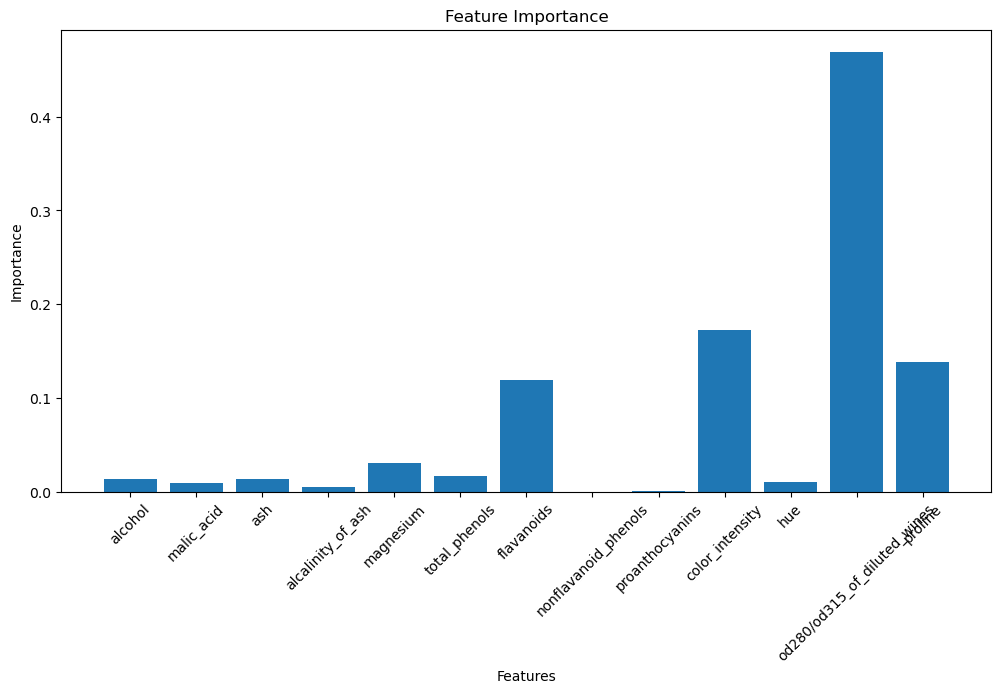

In [80]:
from sklearn.datasets import load_wine
data=load_wine()
df=pd.DataFrame(data.data,columns=data.feature_names)
col_names=df.columns
df['target']=data.target
X=df.drop('target',axis=1)
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=XGBClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
feature_importance=model.feature_importances_
print('Feature Importance:',feature_importance)
plt.figure(figsize=(12,6))
plt.bar(range(len(feature_importance)),feature_importance)
plt.xticks(ticks=range(len(col_names)),labels=col_names,rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


<h3>24.Train a CatBoost Classifier and plot the confusion matrix

Accuracy: 0.8260869565217391


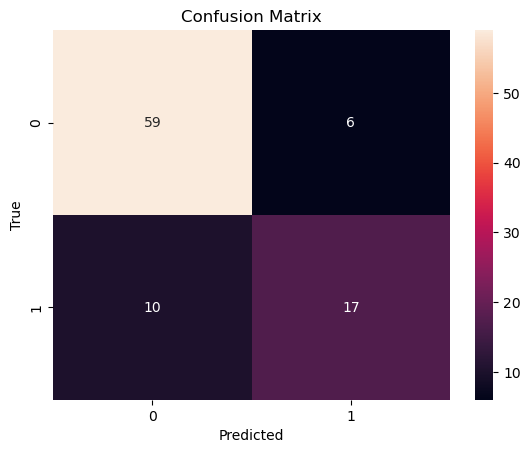

In [84]:
from catboost import CatBoostClassifier
df=pd.read_csv(r'C:\Users\rajuc\Downloads\water_potability.csv')
df.head()
X=df.drop('Potability',axis=1)
y=df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=CatBoostClassifier(n_estimators=100,random_state=42,verbose=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<h3>25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

In [100]:
from sklearn.ensemble import AdaBoostClassifier
df=pd.read_csv(r'C:\Users\rajuc\Downloads\water_potability.csv')
df.head()
df=df.dropna()
X=df.drop('Potability',axis=1)
y=df['Potability']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [102]:
estimators=[10,50,100,200]
for estimator in estimators:
  model=AdaBoostClassifier(n_estimators=estimator,random_state=42)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(f'Accuracy with {estimator} estimators: {accuracy}')

Accuracy with 10 estimators: 0.711864406779661
Accuracy with 50 estimators: 0.6440677966101694
Accuracy with 100 estimators: 0.5423728813559322
Accuracy with 200 estimators: 0.5423728813559322


<h3>26.Train a Gradient Boosting Classifier and visualize the ROC curve 

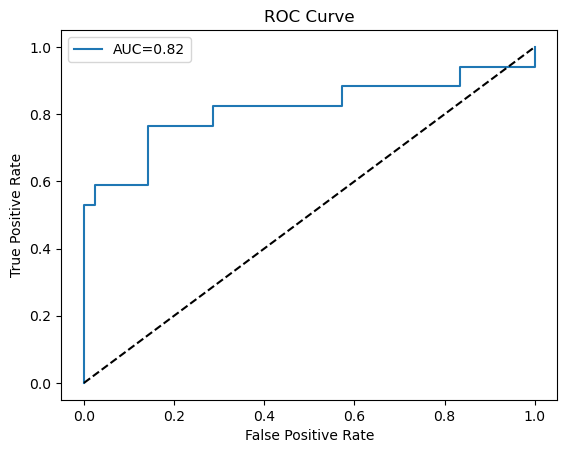

In [105]:
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred_prob=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<h3>27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [109]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid={'learning_rate':[0.01,0.1,0.2,0.3]}
model=XGBClassifier(n_estimators=100)
grid_search=GridSearchCV(model,param_grid,cv=5,verbose=1)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_
best_score=grid_search.best_score_
print('Best Parameters:',best_params)
print('Best Score:',best_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'learning_rate': 0.3}
Best Score: 0.8289546716003701


<h3>28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

In [116]:
df=pd.read_excel(r'C:\Users\rajuc\Downloads\glass_imbalanced.xlsx')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.0,140066.00000,73282.00,0.68931,804468.0,0.0,0.1224,negative
1,15176423,129777.00,353812.0,121127.00000,73002.00,0.65205,852888.0,0.0,0.0000,negative
2,152212996,1420795.00,382099.0,0.46976,71.77,0.11178,95726.0,0.0,0.0000,negative
3,152222108,1321045.00,37716.0,0.79076,719884.00,0.13041,102452.0,0.0,0.0000,negative
4,151755118,13.39,365935.0,11888.00000,727892.00,0.57132,827064.0,0.0,0.0561,negative


In [120]:
df.Class.value_counts()

Class
negative    185
positive     29
Name: count, dtype: int64

In [126]:
X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model = CatBoostClassifier(class_weights=[1, 185/29], random_state=42,verbose=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print("Accuracy score using Class_weights param: ",accuracy) 

Accuracy score using Class_weights param:  0.9534883720930233


In [128]:
model = CatBoostClassifier(random_state=42,verbose=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

print("Accuracy score without using Class_weights param: ",accuracy) 

Accuracy score without using Class_weights param:  0.9302325581395349


<h3>29.Train an AdaBoost Classifier and analyze the effect of different learning rates

In [130]:
X,y=make_classification(n_samples=1000,n_features=8,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
learning_rates = [0.01, 0.1, 0.5, 1.0]

# Train and evaluate
for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with learning rate {lr}: {accuracy}')


Accuracy with learning rate 0.01: 0.875
Accuracy with learning rate 0.1: 0.885
Accuracy with learning rate 0.5: 0.895
Accuracy with learning rate 1.0: 0.89


<h3>30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [138]:
from sklearn.metrics import log_loss
X,y=make_classification(n_samples=1500,n_features=8,n_informative=5,n_classes=4,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=XGBClassifier(n_estimators=100,objective='multi:softmax',num_class=4)
model.fit(X_train,y_train)
y_pred_prob=model.predict_proba(X_test)
log_loss=log_loss(y_test,y_pred_prob)
print('Log Loss:',log_loss)


Log Loss: 0.5209984866317527
